# Project: Learn how machine learning models fit data and how to handle small and large datasets

### 1. Project 1: Machine Learning Model Fitting


Project: Predicting House Prices using Linear Regression

Description: Train a linear regression model to predict house prices based on features like square footage, number of bedrooms, and location.

Python Code:

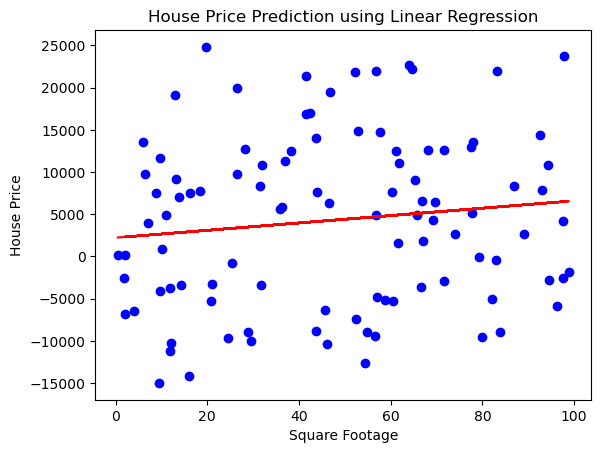

In [2]:
import numpy as np
import matplotlib.pyplot as plt  # Importing Matplotlib for plotting
from sklearn.linear_model import LinearRegression

# Generate synthetic dataset
np.random.seed(0)
X = np.random.rand(100, 1) * 100  # Features (e.g., square footage)
y = 50 * X + np.random.randn(100, 1) * 10000  # Labels (e.g., house prices)

# Train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
predictions = model.predict(X)

# Display the results
plt.scatter(X, y, color='blue')
plt.plot(X, predictions, color='red')
plt.xlabel('Square Footage')
plt.ylabel('House Price')
plt.title('House Price Prediction using Linear Regression')
plt.show()



### Project 2: Understanding Model Overfitting and Underfitting
Project: Digit Recognition using a Neural Network

Description: Train a neural network to recognize handwritten digits from the MNIST dataset, and observe the effects of overfitting and underfitting.

Python Code:

In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

# Flatten the images
X_train_flat = X_train.reshape(X_train.shape[0], -1) / 255.0
X_val_flat = X_val.reshape(X_val.shape[0], -1) / 255.0

# Define and train a simple neural network
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_flat, y_train, validation_data=(X_val_flat, y_val), epochs=10)

# Plot training and validation accuracy/loss to observe overfitting and underfitting
# ... (code to plot accuracy and loss curves)


2023-09-22 22:22:26.806485: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


11490434/11490434 [==============================] - 2s 0us/step
Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2023-09-22 22:22:33.364642: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-09-22 22:22:33.365327: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/10


2023-09-22 22:22:34.829566: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1500/1500 [==============================] - ETA: 0s - loss: 0.2845 - accuracy: 0.9187

2023-09-22 22:23:09.083786: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1500/1500 [==============================] - 37s 23ms/step - loss: 0.2845 - accuracy: 0.9187 - val_loss: 0.1516 - val_accuracy: 0.9546
Epoch 2/10
1500/1500 [==============================] - 32s 21ms/step - loss: 0.1297 - accuracy: 0.9624 - val_loss: 0.1109 - val_accuracy: 0.9674
Epoch 3/10
1500/1500 [==============================] - 31s 21ms/step - loss: 0.0893 - accuracy: 0.9731 - val_loss: 0.0935 - val_accuracy: 0.9703
Epoch 4/10
1500/1500 [==============================] - 33s 22ms/step - loss: 0.0665 - accuracy: 0.9802 - val_loss: 0.0892 - val_accuracy: 0.9712
Epoch 5/10
1500/1500 [==============================] - 35s 23ms/step - loss: 0.0502 - accuracy: 0.9850 - val_loss: 0.0822 - val_accuracy: 0.9739
Epoch 6/10
 934/1500 [=================>............] - ETA: 11s - loss: 0.0401 - accuracy: 0.9886

#### Project 3: Strategies for Model Fitting
Project: Image Classification using Convolutional Neural Networks (CNN)

Description: Implement a CNN to classify images from the CIFAR-10 dataset, employing strategies like regularization and cross-validation.

Python Code:

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

# Preprocess the data
X_train = X_train.astype('float32') / 255.0
X_val = X_val.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=64)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)


In this project continuation, we load the CIFAR-10 dataset, preprocess the data, define a CNN architecture, compile and train the model, and evaluate its performance. Regularization techniques and cross-validation could be incorporated into this code by adjusting the model architecture and training/validation process accordingly.